#Set de datos para test



##Acceso al drive

In [ ]:
from google.colab import drive

# Montar el nuevo Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Carga y Preprocesamiento de Imágenes desde una Carpeta en Google Drive

In [ ]:
import os
from PIL import Image
import numpy as np

# La ruta
load_folder = '/content/drive/MyDrive/Colab Notebooks/PP/Test data'  # Ruta en el nuevo Google Drive

# Listar todos los archivos en la carpeta
image_files = [f for f in os.listdir(load_folder) if f.endswith('.png')]

# Inicializar lista para las imágenes
loaded_images = []

# Cargar las imágenes
for image_file in image_files:
    # Cargar la imagen
    image_path = os.path.join(load_folder, image_file)
    img = Image.open(image_path)
    img = np.array(img) / 255.0  # Normalizar la imagen
    loaded_images.append(img)

# Convertir las imágenes a un array de NumPy
loaded_images = np.array(loaded_images)

print(f"Imágenes cargadas: {loaded_images.shape}")



Imágenes cargadas: (3928, 64, 64, 3)


##Visualizar Imágenes desde una Carpeta en Google Drive

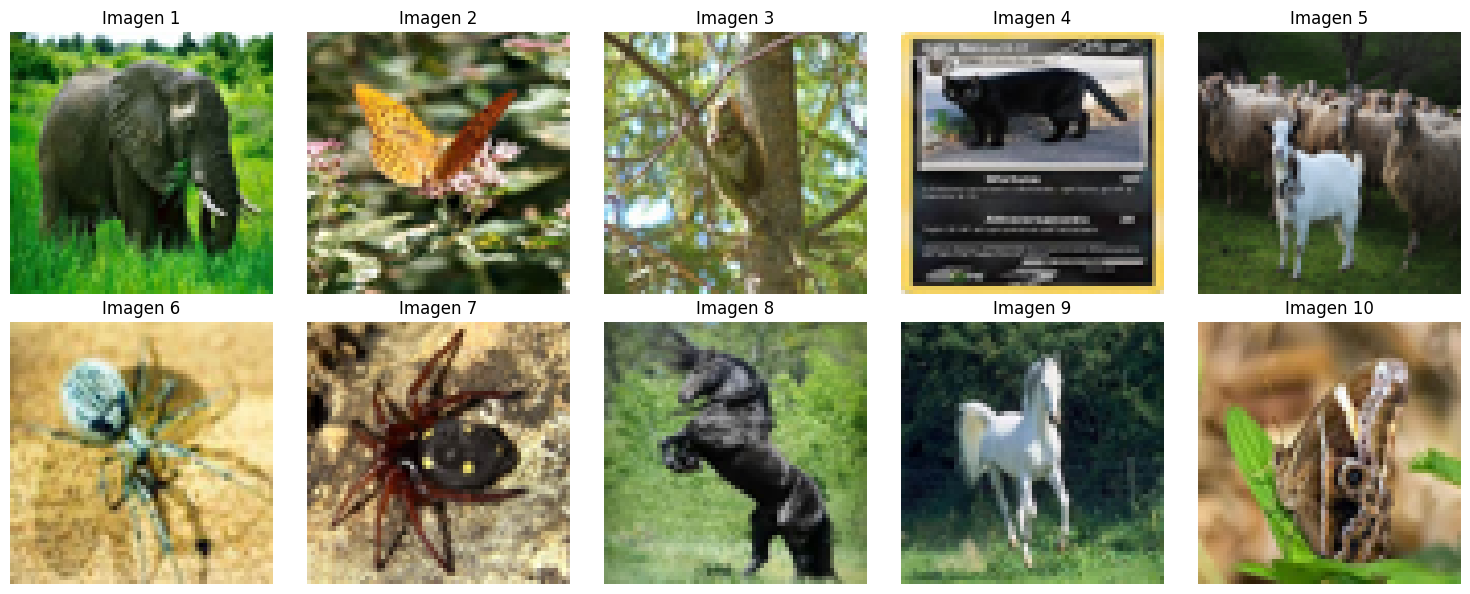

Imágenes cargadas: (3928, 64, 64, 3)


In [ ]:
import matplotlib.pyplot as plt
# Mostrar las primeras 10 imágenes
num_images_to_show = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Ajusta las dimensiones de la figura
axes = axes.ravel()  # Convertir a una lista unidimensional para facilitar el acceso

for i in range(num_images_to_show):
    axes[i].imshow(loaded_images[i])
    axes[i].axis('off')  # Desactivar los ejes
    axes[i].set_title(f'Imagen {i+1}')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()
plt.show()

# Mostrar el número de imágenes cargadas
print(f"Imágenes cargadas: {loaded_images.shape}")

#Red Convolucional

##Cargar modelo de red neuronal desde drive

In [ ]:
from tensorflow.keras.models import load_model

# Ruta del modelo
model_path = '/content/drive/MyDrive/Colab Notebooks/PP/final_model.keras'

# Cargar el modelo
model = load_model(model_path)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 112)         │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 112)         │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 112)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          64,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 448)         │         258,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 448)         │           1,792 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 448)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,258,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          82,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,008,832 (99.22 MB)

 Trainable params: 8,669,194 (33.07 MB)

 Non-trainable params: 1,248 (4.88 KB)

 Optimizer params: 17,338,390 (66.14 MB)

##Generación de Predicciones para Imágenes con un Modelo de Clasificación Multiclase (Salida Numérica de Clases Predichas)

Este proceso utiliza el modelo de clasificación multiclase para predecir a qué clase pertenece cada imagen de un conjunto dado. La salida del modelo es una lista de números, donde cada número corresponde a una clase predicha. Estos números representan el índice de la clase más probable, lo que permite ver de manera clara cómo cada imagen es asociada a una categoría específica.

La idea es que el modelo asigna un valor numérico (por ejemplo, un 4 o un 8) a cada imagen, y estos valores corresponden a clases específicas, como "araña" o "caballo". Mientras más alto sea el valor de predicción para una clase, mayor es la certeza del modelo sobre que la imagen pertenece a esa clase.

Mapeo de clases (ejemplo):

0: caballo
1: ardilla
2: oveja
3: gallina
4: araña
5: perro
6: gato
7: vaca
8: elefante
9: mariposa

De esta forma, se facilita la interpretación de las predicciones, mostrando directamente las clases predichas mediante los índices numéricos y su correspondiente categoría.

In [ ]:
# Realiza las predicciones sobre el conjunto de imágenes cargadas (las del test)
predictions = model.predict(loaded_images)
print(predictions.shape)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las clases predichas para las primeras 10 imágenes
print(predicted_classes[:10])


123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 383ms/step
(3928, 10)
[8 9 1 6 2 4 4 0 0 9]


##Visualización de Imágenes con Predicciones de Clase Utilizando un Modelo de Clasificación Multiclase

Este código muestra un conjunto de imágenes junto con las predicciones de clase realizadas por un modelo de clasificación multiclase. Cada imagen se presenta en una cuadrícula organizada de 5 columnas y un número dinámico de filas según la cantidad total de imágenes que se desean mostrar (en este caso, 100 imágenes).

Para cada imagen, se obtiene la clase predicha mediante su índice numérico, el cual se mapea a una etiqueta de clase (como "caballo", "perro", etc.). El título de cada subgráfica se establece con el nombre de la clase predicha, permitiendo visualizar claramente qué clase el modelo ha asignado a cada imagen.

La cuadrícula de imágenes permite una visualización fácil y rápida del rendimiento del modelo al clasificar diversas imágenes, facilitando la interpretación de las predicciones.

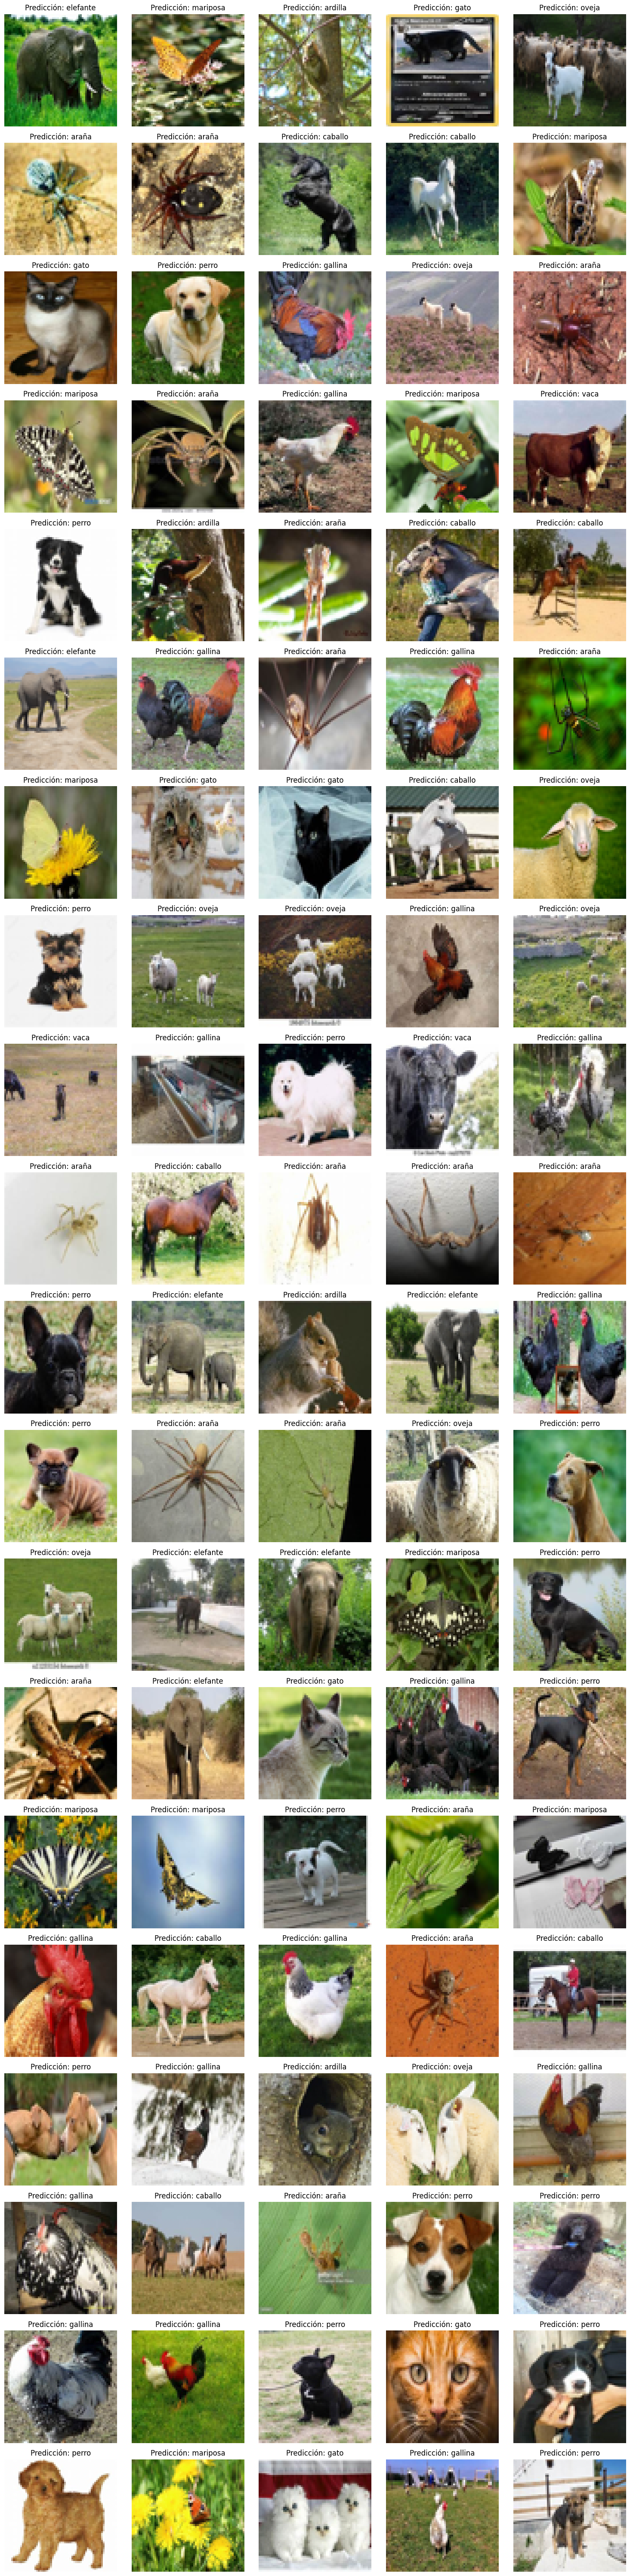

In [ ]:
import matplotlib.pyplot as plt
import math

# Diccionario de clases
# Diccionario de clases
class_names = {
    0: 'caballo', 1: 'ardilla', 2: 'oveja', 3: 'gallina', 4: 'araña',
    5: 'perro', 6: 'gato', 7: 'vaca', 8: 'elefante', 9: 'mariposa'
}

# Número de imágenes que deseas mostrar
num_images = 100

# Calcular el número de filas y columnas necesarias para mostrar todas las imágenes
num_cols = 5  # Número fijo de columnas
num_rows = math.ceil(num_images / num_cols)  # Calcular filas necesarias

# Crear una figura con el número adecuado de filas y columnas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Recorrer las imágenes y sus predicciones
for i in range(num_images):
    row = i // num_cols  # Fila
    col = i % num_cols   # Columna

    # Mostrar la imagen
    axes[row, col].imshow(loaded_images[i])

    # Obtener la predicción como nombre de la clase
    predicted_class_name = class_names[predicted_classes[i]]

    # Establecer el título con el nombre de la clase
    axes[row, col].set_title(f'Predicción: {predicted_class_name}')

    # Desactivar los ejes
    axes[row, col].axis('off')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()
plt.show()






##Predicción de Clase para una Imagen con un Modelo de Clasificación Multiclase

Este código carga una imagen desde una ruta específica (en este caso, ubicada en Google Drive), la preprocesa para que sea compatible con un modelo de clasificación multiclase, y luego realiza una predicción sobre la clase de la imagen. La imagen se redimensiona a un tamaño específico de (64, 64) píxeles y se normaliza antes de ser alimentada al modelo para hacer la predicción.

El modelo devuelve una probabilidad para cada clase posible, y el índice de la clase con mayor probabilidad se utiliza para determinar la clase predicha, la cual se mapea a su nombre correspondiente (por ejemplo, "vaca", "caballo"). Luego, se visualiza la imagen cargada con un título que muestra la clase predicha.

El resultado de la predicción se imprime en la consola, proporcionando una fácil visualización y evaluación del rendimiento del modelo en esta imagen específica.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


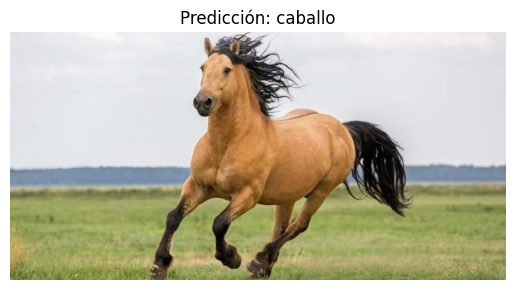

La clase predicha es: caballo


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Ruta de la imagen en Google Drive
image_path = "/content/caballos-e1626738224231.jpg"  # Para probar sube una imagen a este collab y acá pega la ruta de tu imagen

# Tamaño esperado por el modelo
image_size = (64, 64)

# Diccionario de clases (esto es un poco desastre debido a que se mapeoron diferente cada que volvia a preprocesar para entrenar una red nueva)
class_names = {
    0: 'caballo', 1: 'ardilla', 2: 'oveja', 3: 'gallina', 4: 'araña',
    5: 'perro', 6: 'gato', 7: 'vaca', 8: 'elefante', 9: 'mariposa'
}

# Cargar y preprocesar la imagen
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Convertir a RGB
    img_resized = img.resize(image_size)  # Ajustar tamaño
    img_array = np.array(img_resized) / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    return img_array

# Preprocesar la imagen
image_to_predict = preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(image_to_predict)
predicted_class_index = tf.argmax(prediction, axis=1).numpy()[0]

# Mapear el índice a la etiqueta
predicted_class_name = class_names[predicted_class_index]

# Mostrar la imagen cargada
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {predicted_class_name}')
plt.show()

# Mostrar el resultado
print(f"La clase predicha es: {predicted_class_name}")


#Red de Variables separables

In [ ]:
from tensorflow.keras.models import load_model

# Ruta del modelo
model_path = '/content/drive/MyDrive/Colab Notebooks/PP/final_model_consepara.keras'

# Cargar el modelo
model = load_model(model_path)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d_1 (SeparableConv2D) │ (None, 62, 62, 112)         │             475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 112)         │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 112)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 29, 29, 64)          │           8,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 12, 12, 448)         │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 448)         │           1,792 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 448)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,258,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          82,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,145,441 (95.92 MB)

 Trainable params: 8,381,397 (31.97 MB)

 Non-trainable params: 1,248 (4.88 KB)

 Optimizer params: 16,762,796 (63.94 MB)

In [ ]:
# Realizar las predicciones sobre el conjunto de imágenes cargadas
predictions = model.predict(loaded_images)
print(predictions.shape)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las clases predichas para las primeras 10 imágenes
print(predicted_classes[:10])

123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step
(3928, 10)
[8 3 7 6 4 2 2 1 1 3]


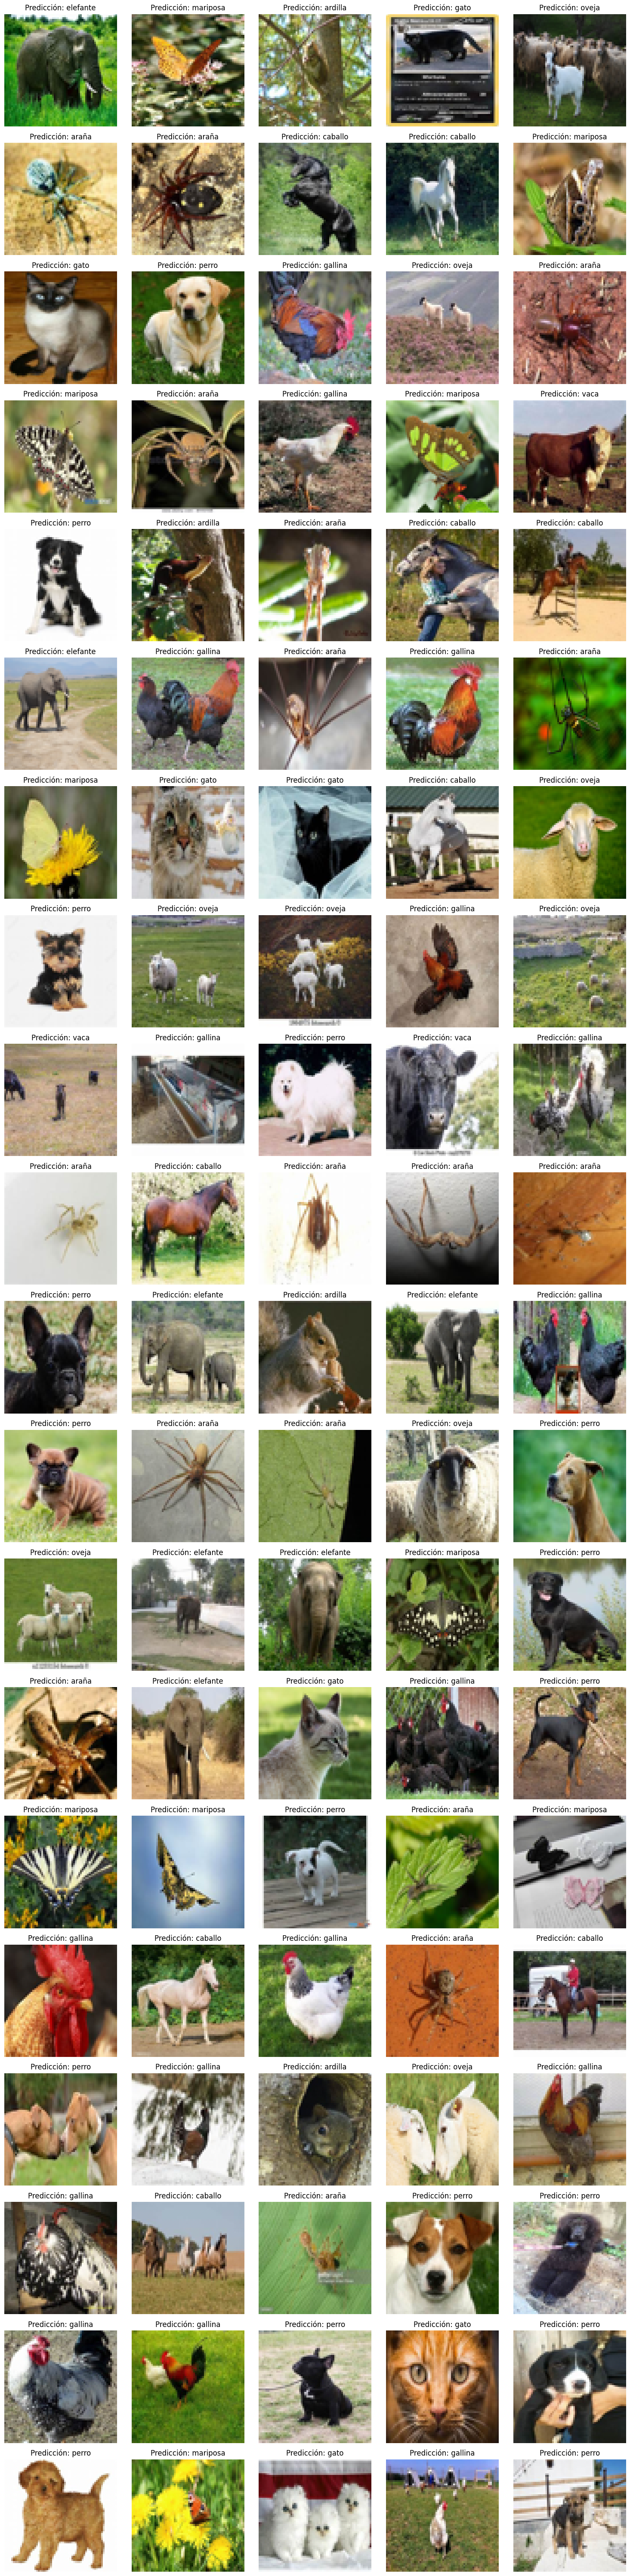

In [ ]:
import matplotlib.pyplot as plt
import math

# Diccionario de clases
# Diccionario de clases
class_names = {
    0: 'caballo', 1: 'ardilla', 2: 'oveja', 3: 'gallina', 4: 'araña',
    5: 'perro', 6: 'gato', 7: 'vaca', 8: 'elefante', 9: 'mariposa'
}

# Número de imágenes que deseas mostrar
num_images = 100

# Calcular el número de filas y columnas necesarias para mostrar todas las imágenes
num_cols = 5  # Número fijo de columnas
num_rows = math.ceil(num_images / num_cols)  # Calcular filas necesarias

# Crear una figura con el número adecuado de filas y columnas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Recorrer las imágenes y sus predicciones
for i in range(num_images):
    row = i // num_cols  # Fila
    col = i % num_cols   # Columna

    # Mostrar la imagen
    axes[row, col].imshow(loaded_images[i])

    # Obtener la predicción como nombre de la clase
    predicted_class_name = class_names[predicted_classes[i]]

    # Establecer el título con el nombre de la clase
    axes[row, col].set_title(f'Predicción: {predicted_class_name}')

    # Desactivar los ejes
    axes[row, col].axis('off')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()
plt.show()





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


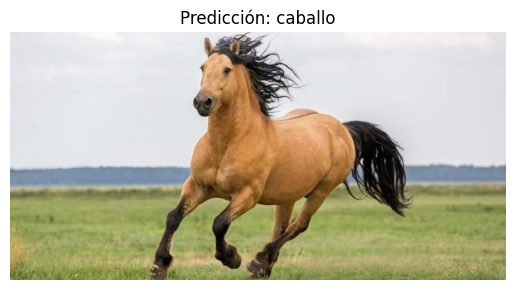

La clase predicha es: caballo


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Ruta de la imagen en Google Drive
image_path = "/content/caballos-e1626738224231.jpg"

# Tamaño esperado por el modelo
image_size = (64, 64)

# Diccionario de clases
class_names = {
    0: 'caballo', 1: 'ardilla', 2: 'oveja', 3: 'gallina', 4: 'araña',
    5: 'perro', 6: 'gato', 7: 'vaca', 8: 'elefante', 9: 'mariposa'
}

# Cargar y preprocesar la imagen
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Convertir a RGB
    img_resized = img.resize(image_size)  # Ajustar tamaño
    img_array = np.array(img_resized) / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    return img_array

# Preprocesar la imagen
image_to_predict = preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(image_to_predict)
predicted_class_index = tf.argmax(prediction, axis=1).numpy()[0]

# Mapear el índice a la etiqueta
predicted_class_name = class_names[predicted_class_index]

# Mostrar la imagen cargada
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {predicted_class_name}')
plt.show()

# Mostrar el resultado
print(f"La clase predicha es: {predicted_class_name}")

#Red de Variables separables con valores de Optuna

In [ ]:
from tensorflow.keras.models import load_model

# Ruta del modelo
model_path = '/content/drive/MyDrive/Colab Notebooks/PP/final_model_sepa2.keras'

# Cargar el modelo
model = load_model(model_path)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ separable_conv2d (SeparableConv2D)   │ (None, 62, 62, 48)          │             219 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 29, 29, 96)          │           5,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 12, 12, 512)         │          50,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          82,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,737,057 (109.62 MB)

 Trainable params: 9,578,581 (36.54 MB)

 Non-trainable params: 1,312 (5.12 KB)

 Optimizer params: 19,157,164 (73.08 MB)

In [ ]:
# Realizar las predicciones sobre el conjunto de imágenes cargadas
predictions = model.predict(loaded_images)
print(predictions.shape)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las clases predichas para las primeras 10 imágenes
print(predicted_classes[:10])

123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step
(3928, 10)
[3 4 5 2 0 7 7 6 6 4]


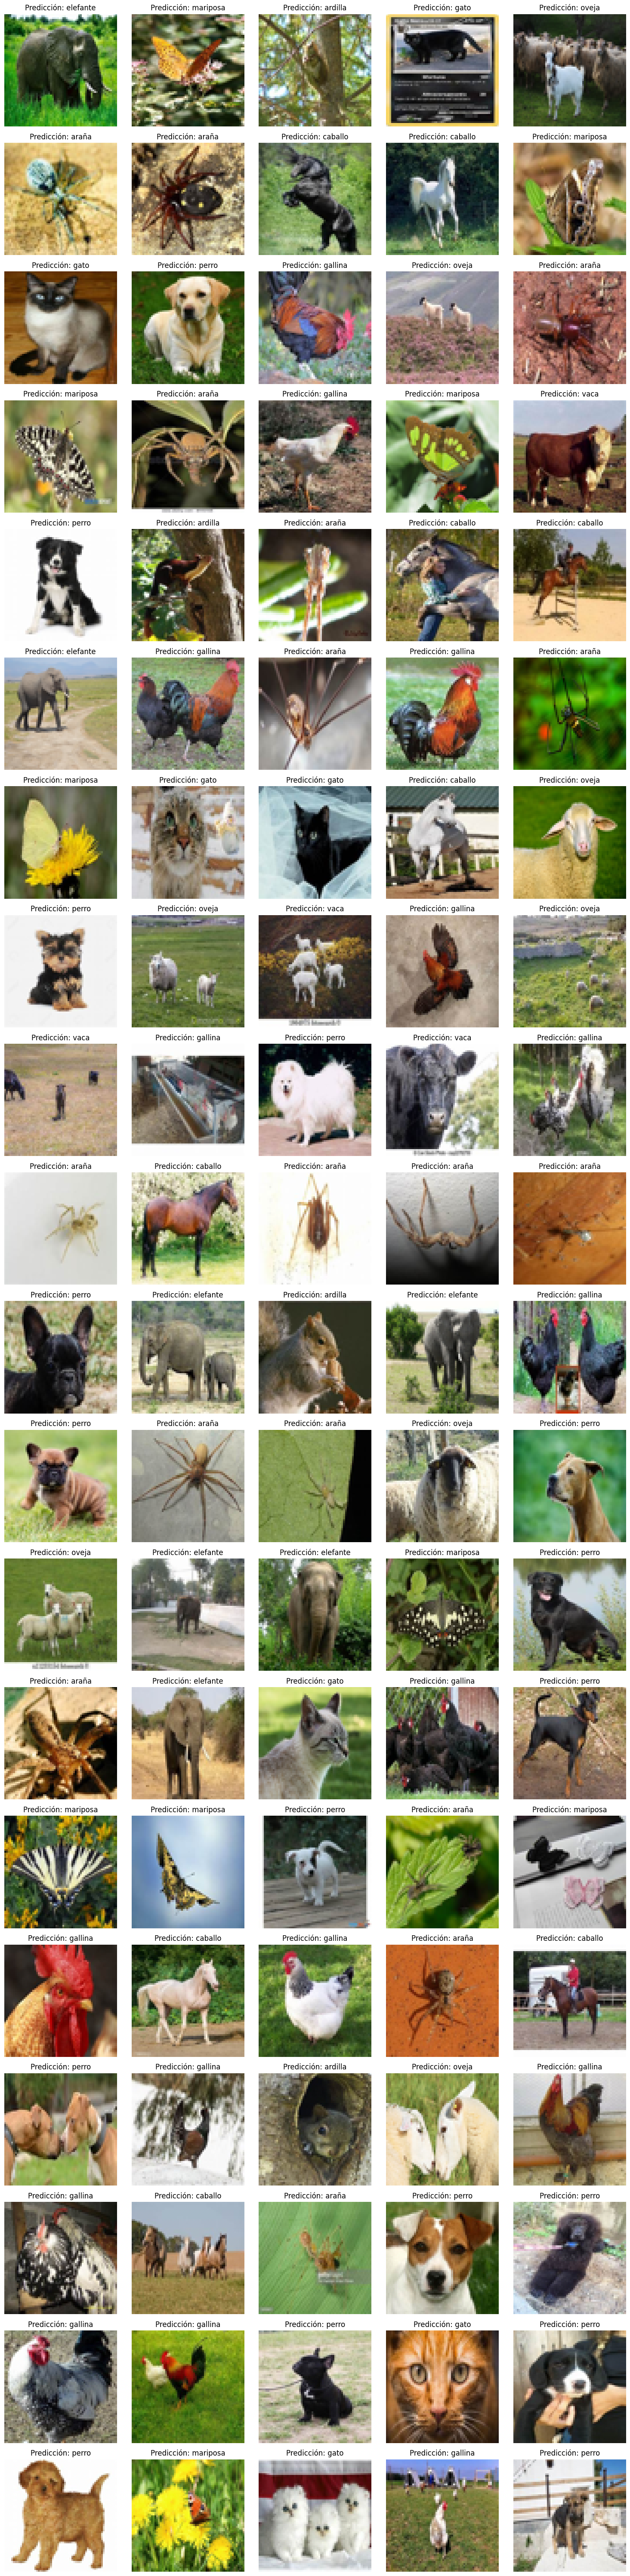

In [ ]:
import matplotlib.pyplot as plt
import math

# Diccionario de clases
class_names = {
    0: 'oveja', 1: 'vaca', 2: 'gato', 3: 'elefante', 4: 'mariposa',
    5: 'ardilla', 6: 'caballo', 7: 'araña', 8: 'perro', 9: 'gallina'
}

# Número de imágenes que deseas mostrar
num_images = 100

# Calcular el número de filas y columnas necesarias para mostrar todas las imágenes
num_cols = 5  # Número fijo de columnas
num_rows = math.ceil(num_images / num_cols)  # Calcular filas necesarias

# Crear una figura con el número adecuado de filas y columnas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Recorrer las imágenes y sus predicciones
for i in range(num_images):
    row = i // num_cols  # Fila
    col = i % num_cols   # Columna

    # Mostrar la imagen
    axes[row, col].imshow(loaded_images[i])

    # Obtener la predicción como nombre de la clase
    predicted_class_name = class_names[predicted_classes[i]]

    # Establecer el título con el nombre de la clase
    axes[row, col].set_title(f'Predicción: {predicted_class_name}')

    # Desactivar los ejes
    axes[row, col].axis('off')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()
plt.show()





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


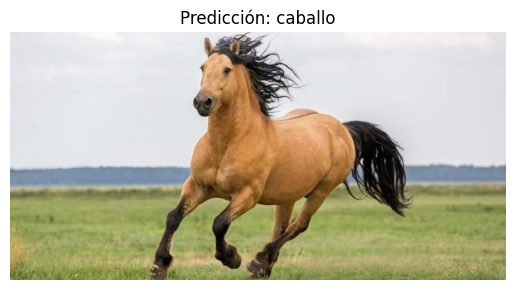

La clase predicha es: caballo


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Ruta de la imagen en Google Drive
image_path = "/content/caballos-e1626738224231.jpg"

# Tamaño esperado por el modelo
image_size = (64, 64)

# Diccionario de clases
class_names = {
    0: 'oveja', 1: 'vaca', 2: 'gato', 3: 'elefante', 4: 'mariposa',
    5: 'ardilla', 6: 'caballo', 7: 'araña', 8: 'perro', 9: 'gallina'
}

# Cargar y preprocesar la imagen
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Convertir a RGB
    img_resized = img.resize(image_size)  # Ajustar tamaño
    img_array = np.array(img_resized) / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    return img_array

# Preprocesar la imagen
image_to_predict = preprocess_image(image_path)

# Hacer la predicción
prediction = model.predict(image_to_predict)
predicted_class_index = tf.argmax(prediction, axis=1).numpy()[0]

# Mapear el índice a la etiqueta
predicted_class_name = class_names[predicted_class_index]

# Mostrar la imagen cargada
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {predicted_class_name}')
plt.show()

# Mostrar el resultado
print(f"La clase predicha es: {predicted_class_name}")